In [1]:

import pandas as pd
from evaluation_scenario import EvaluationScenario, EvaluationScenarioCollection, EvaluationUtils, EvaluationMetrics
from evaluation_utils import get_all_files_in_path

In [2]:
model_paths: str = '../models'
evaluations_paths: str = '../evaluation/all'

In [9]:
actual_cpu: pd.Series = EvaluationMetrics.actual_cpu
plan_cpu: pd.Series = EvaluationMetrics.plan_cpu
actual_mem: pd.Series = EvaluationMetrics.actual_mem
plan_mem: pd.Series = EvaluationMetrics.plan_mem

In [3]:
evaluation_file_paths: list[str] = get_all_files_in_path(evaluations_paths, '.csv')

In [4]:
evaluation_file_paths

['../evaluation/all/util_lstm_train_with_penalty_loss.csv',
 '../evaluation/all/loss_progression_with_tasks.csv',
 '../evaluation/all/loss_progression_with_no_tasks.csv',
 '../evaluation/all/loss_progression_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_no_tasks.csv',
 '../evaluation/all/util_lstm_test_with_small_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_medium_batch_size.csv',
 '../evaluation/all/util_lstm_train_with_instances.csv',
 '../evaluation/all/loss_progression_with_medium_batch_size.csv',
 '../evaluation/all/loss_progression_with_penalty_loss.csv',
 '../evaluation/all/util_lstm_test_with_tasks.csv',
 '../evaluation/all/util_lstm_train_with_rmse_loss.csv',
 '../evaluation/all/loss_progression_with_instances.csv',
 '../evaluation/all/util_lstm_test_with_instances.csv',
 '../evaluation/all/util_lstm_test_with_no_tasks.csv',
 '../evaluation/all/loss_progression_with_rmse_loss.cs

In [119]:
collection = EvaluationScenarioCollection(evaluation_file_paths)
evaluations: dict[str, EvaluationScenario] = collection.evaluation_collection

In [120]:
evaluations

{'with_penalty_loss': EvaluationScenario(name='with_penalty_loss'),
 'with_tasks': EvaluationScenario(name='with_tasks'),
 'with_no_tasks': EvaluationScenario(name='with_no_tasks'),
 'with_small_batch_size': EvaluationScenario(name='with_small_batch_size'),
 'with_medium_batch_size': EvaluationScenario(name='with_medium_batch_size'),
 'with_instances': EvaluationScenario(name='with_instances'),
 'with_rmse_loss': EvaluationScenario(name='with_rmse_loss'),
 'with_large_batch_size': EvaluationScenario(name='with_large_batch_size')}

In [121]:
no_tasks_eval: EvaluationScenario = evaluations['with_no_tasks']
no_tasks_eval.get_cpu_train_df()

,actual cpu usage,predicted cpu usage,allocated cpu
0,773.050842,233.303329,400.000031
1,608.671021,901.894348,600.000000
2,608.102478,901.894348,600.000000
3,385.129120,901.894348,600.000000
4,614.094116,901.894348,600.000000
...,...,...,...
4995,23.076925,97.586464,600.000000
4996,22.769234,97.586464,600.000000
4997,19.000000,97.586464,600.000000
4998,23.812502,97.586464,600.000000


# User Utilisation

This section contains the utilisation that was done by users.

In [122]:
def prepare_user_utilisation_df(df: pd.DataFrame) -> pd.DataFrame:
    user_df = df.copy()
    return user_df.iloc[:, [0, 2]]

In [123]:
user_cpu_test_df = prepare_user_utilisation_df(no_tasks_eval.get_cpu_train_df())
user_mem_test_df = prepare_user_utilisation_df(no_tasks_eval.get_mem_train_df())

In [124]:
user_cpu_test_df

,actual cpu usage,allocated cpu
0,773.050842,400.000031
1,608.671021,600.000000
2,608.102478,600.000000
3,385.129120,600.000000
4,614.094116,600.000000
...,...,...
4995,23.076925,600.000000
4996,22.769234,600.000000
4997,19.000000,600.000000
4998,23.812502,600.000000


In [125]:
pd.concat([actual_cpu, plan_cpu], axis=1)

,cpu_usage,plan_cpu
0,773.050807,400.0
1,608.671034,600.0
2,608.102445,600.0
3,385.129135,600.0
4,614.094135,600.0
...,...,...
4995,23.076923,600.0
4996,22.769231,600.0
4997,19.000000,600.0
4998,23.812500,600.0


In [126]:
user_mem_test_df

,actual mem usage,allocated mem
0,20.825195,10.000000
1,29.648438,29.296875
2,29.830078,29.296875
3,29.396484,29.296875
4,29.597656,29.296875
...,...,...
4995,0.512695,29.296875
4996,0.525391,29.296875
4997,0.522461,29.296875
4998,0.531250,29.296875


In [127]:
print(actual_cpu.describe().round(3).to_latex())

\begin{tabular}{lr}
\toprule
{} &  cpu\_usage \\
\midrule
count &   5000.000 \\
mean  &    516.073 \\
std   &    881.832 \\
min   &      1.023 \\
25\%   &    103.632 \\
50\%   &    208.749 \\
75\%   &    528.076 \\
max   &   7790.371 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/4217741695.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(actual_cpu.describe().round(3).to_latex())


In [128]:
print(actual_mem.describe().round(3).to_latex())

\begin{tabular}{lr}
\toprule
{} &   max\_mem \\
\midrule
count &  5000.000 \\
mean  &    17.203 \\
std   &    74.761 \\
min   &     0.003 \\
25\%   &     2.160 \\
50\%   &     7.699 \\
75\%   &    15.976 \\
max   &  1992.484 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2059094543.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(actual_mem.describe().round(3).to_latex())


In [129]:
def merge_describe_with_actual(df: pd.DataFrame, column: int, is_cpu: bool) -> pd.DataFrame:
    temp_ser: pd.Series[float] = df.iloc[:, column]
    temp_ser = temp_ser.describe().round(2)
    
    merge_actual: pd.Series[float] = actual_cpu if is_cpu else actual_mem
    merge_actual = merge_actual.describe().round(2)
    
        
    ret_df: pd.DataFrame = pd.concat([temp_ser, merge_actual], axis=1)
    
    ret_df.drop(index=['count'], inplace=True)
    
    return ret_df

def print_latex_table(df: pd.DataFrame, column: int, is_cpu: bool) -> None:
    df = merge_describe_with_actual(df, column, is_cpu)
    print(df.to_latex())
    
def print_metrics(actual: pd.Series, predicted: pd.Series, table_name: str = 'metrics') -> None:
    print(EvaluationMetrics.get_all_metrics(actual, predicted, table_name).round(3).to_latex())

In [130]:
def get_comparing_metrics_df(df: pd.DataFrame, actual: int = 0, predicted: int = 1, user_alloc: int = 2, table_name: str = 'LSTM Metrics', to_latex: bool = False) -> pd.DataFrame:
    actual_ser: pd.Series = df.iloc[:, actual]
    predicted_ser: pd.Series = df.iloc[:, predicted]
    alloc_ser: pd.Series = df.iloc[:, user_alloc]
    pred_metrics = EvaluationMetrics.get_all_metrics(actual_ser, predicted_ser, table_name)
    alloc_metrics = EvaluationMetrics.get_all_metrics(actual_ser, alloc_ser, 'User Predicted')
    
    comp_df = pd.concat([pred_metrics, alloc_metrics])
    
    if to_latex:
        print(comp_df.round(3).to_latex())
    return comp_df

In [131]:
print(no_tasks_eval.get_cpu_train_df().describe().round(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  actual cpu usage &  predicted cpu usage &  allocated cpu \\
\midrule
count &          5000.000 &             5000.000 &       5000.000 \\
mean  &           516.073 &              392.630 &        632.809 \\
std   &           881.832 &              705.771 &        496.245 \\
min   &             1.023 &                3.030 &          5.000 \\
25\%   &           103.632 &               97.586 &        400.000 \\
50\%   &           208.749 &              118.014 &        600.000 \\
75\%   &           528.076 &              281.472 &        600.000 \\
max   &          7790.372 &             5793.996 &       6400.000 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/872513898.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(no_tasks_eval.get_cpu_train_df().describe().round(3).to_latex())


In [132]:
user_cpu_test_df_over_alloc = EvaluationUtils.get_over_allocated_df(user_cpu_test_df, 0, 1)
user_cpu_test_df_under_alloc = EvaluationUtils.get_under_allocated_df(user_cpu_test_df, 0, 1)

In [133]:
print_latex_table(user_cpu_test_df, 1, True)

\begin{tabular}{lrr}
\toprule
{} &  allocated cpu &  cpu\_usage \\
\midrule
mean &         632.81 &     516.07 \\
std  &         496.24 &     881.83 \\
min  &           5.00 &       1.02 \\
25\%  &         400.00 &     103.63 \\
50\%  &         600.00 &     208.75 \\
75\%  &         600.00 &     528.08 \\
max  &        6400.00 &    7790.37 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [134]:
print_metrics(actual_cpu, user_cpu_test_df.iloc[:, 1], 'User CPU')

\begin{tabular}{lrrrrr}
\toprule
{} &     RMSE &     MAPE &   SMAPE &    OA &    UA \\
\midrule
User CPU &  812.497 &  355.049 &  89.466 &  72.8 &  27.2 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(EvaluationMetrics.get_all_metrics(actual, predicted, table_name).round(3).to_latex())


In [135]:
print_latex_table(user_mem_test_df, 1, False)

\begin{tabular}{lrr}
\toprule
{} &  allocated mem &  max\_mem \\
\midrule
mean &          26.89 &    17.20 \\
std  &          15.26 &    74.76 \\
min  &           2.00 &     0.00 \\
25\%  &          14.65 &     2.16 \\
50\%  &          29.30 &     7.70 \\
75\%  &          29.30 &    15.98 \\
max  &         146.48 &  1992.48 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [136]:
print_metrics(actual_mem, user_mem_test_df.iloc[:, 1], 'User Memory')

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &      MAPE &   SMAPE &    OA &    UA \\
\midrule
User Memory &  73.853 &  3672.256 &  97.613 &  80.8 &  19.2 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(EvaluationMetrics.get_all_metrics(actual, predicted, table_name).round(3).to_latex())


In [137]:
print_latex_table(user_cpu_test_df, 1, True)

\begin{tabular}{lrr}
\toprule
{} &  allocated cpu &  cpu\_usage \\
\midrule
mean &         632.81 &     516.07 \\
std  &         496.24 &     881.83 \\
min  &           5.00 &       1.02 \\
25\%  &         400.00 &     103.63 \\
50\%  &         600.00 &     208.75 \\
75\%  &         600.00 &     528.08 \\
max  &        6400.00 &    7790.37 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [138]:
print_latex_table(user_mem_test_df, 1, False)

\begin{tabular}{lrr}
\toprule
{} &  allocated mem &  max\_mem \\
\midrule
mean &          26.89 &    17.20 \\
std  &          15.26 &    74.76 \\
min  &           2.00 &     0.00 \\
25\%  &          14.65 &     2.16 \\
50\%  &          29.30 &     7.70 \\
75\%  &          29.30 &    15.98 \\
max  &         146.48 &  1992.48 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/143918865.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [139]:
user_mem_test_df_over_alloc = EvaluationUtils.get_over_allocated_df(user_mem_test_df, 0, 1)
user_mem_test_df_under_alloc = EvaluationUtils.get_under_allocated_df(user_mem_test_df, 0, 1)

In [140]:
user_mem_test_df_over_alloc

,actual mem usage,allocated mem
17,3.363281,7.812500
18,26.324219,29.296875
19,26.712891,29.296875
20,26.550781,29.296875
21,26.582031,29.296875
...,...,...
4995,0.512695,29.296875
4996,0.525391,29.296875
4997,0.522461,29.296875
4998,0.531250,29.296875


# No Task Usage

This section contains the evaluation for the base LSTM model.

In [141]:
def df_to_latex(df: pd.DataFrame):
    p_df: pd.DataFrame = df.describe()
    p_df.drop('count', inplace=True)
    p_df = p_df.round(3)
    print(p_df.to_latex())

In [142]:
df_to_latex(no_tasks_eval.get_cpu_train_df())

\begin{tabular}{lrrr}
\toprule
{} &  actual cpu usage &  predicted cpu usage &  allocated cpu \\
\midrule
mean &           516.073 &              392.630 &        632.809 \\
std  &           881.832 &              705.771 &        496.245 \\
min  &             1.023 &                3.030 &          5.000 \\
25\%  &           103.632 &               97.586 &        400.000 \\
50\%  &           208.749 &              118.014 &        600.000 \\
75\%  &           528.076 &              281.472 &        600.000 \\
max  &          7790.372 &             5793.996 &       6400.000 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [143]:
print(get_comparing_metrics_df(no_tasks_eval.get_cpu_train_df(), table_name='Simple LSTM CPU').round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     RMSE &     MAPE &   SMAPE &     OA &     UA \\
\midrule
Simple LSTM CPU &  797.289 &  206.062 &  85.626 &  41.94 &  58.06 \\
User Predicted  &  812.497 &  355.049 &  89.466 &  72.80 &  27.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/1776680121.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(get_comparing_metrics_df(no_tasks_eval.get_cpu_train_df(), table_name='Simple LSTM CPU').round(3).to_latex())


In [144]:
df_to_latex(no_tasks_eval.get_mem_train_df())

\begin{tabular}{lrrr}
\toprule
{} &  actual mem usage &  predicted mem usage &  allocated mem \\
\midrule
mean &            17.203 &               29.904 &         26.895 \\
std  &            74.761 &               39.634 &         15.259 \\
min  &             0.003 &                1.951 &          2.000 \\
25\%  &             2.160 &               22.178 &         14.648 \\
50\%  &             7.699 &               24.620 &         29.297 \\
75\%  &            15.976 &               24.620 &         29.297 \\
max  &          1992.484 &              550.056 &        146.484 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [145]:
print(get_comparing_metrics_df(no_tasks_eval.get_mem_train_df(), table_name='Simple LSTM MEM').round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &      MAPE &    SMAPE &    OA &    UA \\
\midrule
Simple LSTM MEM &  77.902 &  7711.391 &  109.870 &  77.8 &  22.2 \\
User Predicted  &  73.853 &  3672.256 &   97.613 &  80.8 &  19.2 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3608423092.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(get_comparing_metrics_df(no_tasks_eval.get_mem_train_df(), table_name='Simple LSTM MEM').round(3).to_latex())


# With Task Usage

This section contains the evaluation for the LSTM model that has task knowledge included.

In [146]:
with_tasks_eval: EvaluationScenario = evaluations['with_tasks']

In [147]:
with_tasks_eval.get_cpu_train_df()

,actual cpu usage,predicted cpu usage,allocated cpu
0,773.050842,525.474304,400.000031
1,608.671021,897.155884,600.000000
2,608.102478,897.155884,600.000000
3,385.129120,897.155884,600.000000
4,614.094116,897.155884,600.000000
...,...,...,...
4995,23.076925,129.883926,600.000000
4996,22.769234,129.883926,600.000000
4997,19.000000,129.883926,600.000000
4998,23.812502,129.883926,600.000000


In [148]:
with_tasks_eval.get_mem_train_df()

,actual mem usage,predicted mem usage,allocated mem
0,20.825195,24.389080,10.000000
1,29.648438,53.287861,29.296875
2,29.830078,53.287861,29.296875
3,29.396484,53.287861,29.296875
4,29.597656,53.287861,29.296875
...,...,...,...
4995,0.512695,27.924021,29.296875
4996,0.525391,27.924021,29.296875
4997,0.522461,27.924021,29.296875
4998,0.531250,27.924021,29.296875


<AxesSubplot:>

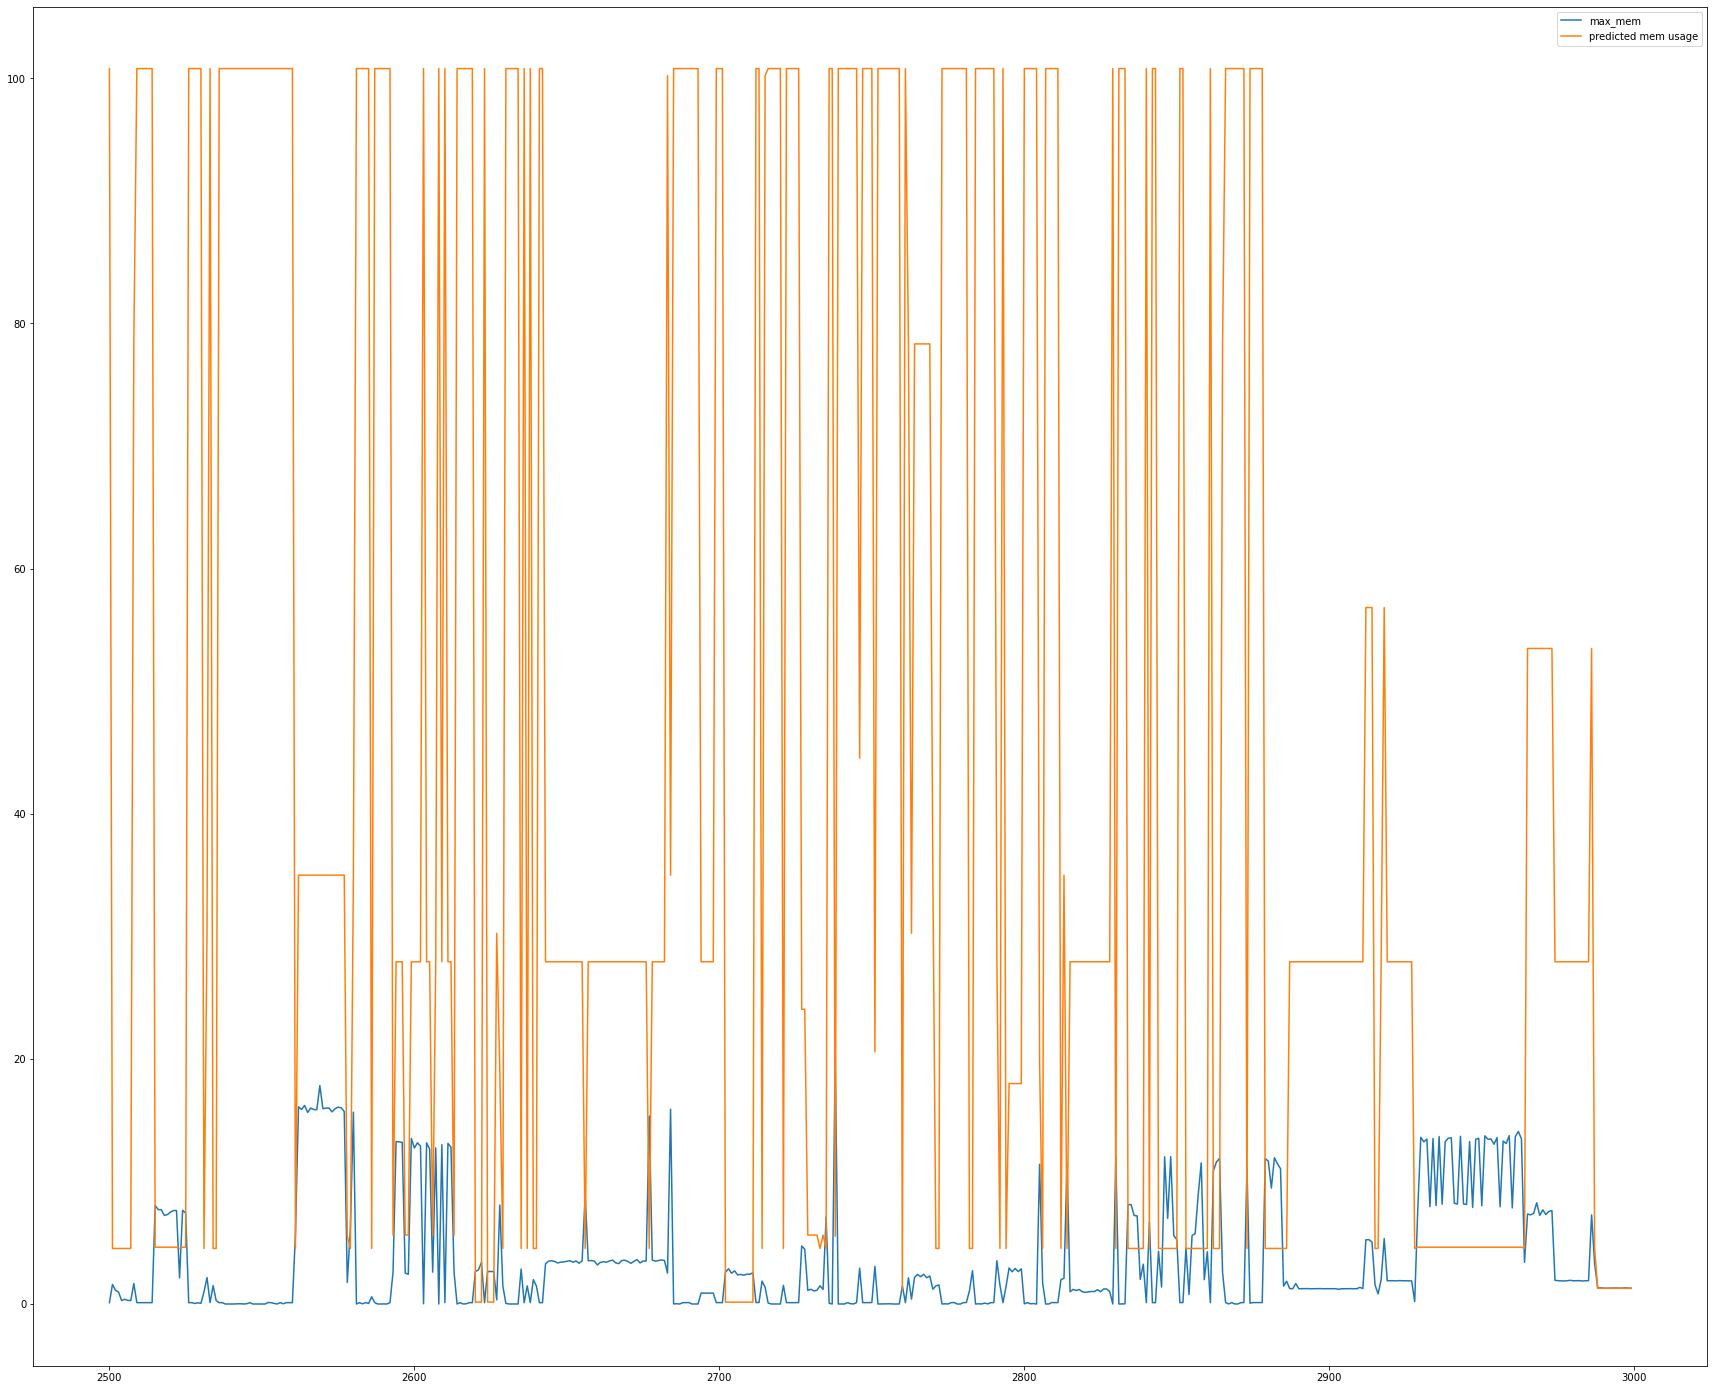

In [149]:
pd.concat([actual_mem, with_tasks_eval.get_mem_train_df().iloc[:, 1]], axis=1).iloc[2500:3000].plot.line(figsize=(30, 25))

In [150]:
EvaluationMetrics.mean_absolute_percentage_error(actual_mem, with_tasks_eval.get_mem_train_df().iloc[:, 1])

32287.181612255303

In [151]:
df_to_latex(with_tasks_eval.get_cpu_train_df())

\begin{tabular}{lrrr}
\toprule
{} &  actual cpu usage &  predicted cpu usage &  allocated cpu \\
\midrule
mean &           516.073 &              454.205 &        632.809 \\
std  &           881.832 &              579.213 &        496.245 \\
min  &             1.023 &                2.395 &          5.000 \\
25\%  &           103.632 &              129.884 &        400.000 \\
50\%  &           208.749 &              249.392 &        600.000 \\
75\%  &           528.076 &              662.490 &        600.000 \\
max  &          7790.372 &             5634.635 &       6400.000 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [152]:
get_comparing_metrics_df(with_tasks_eval.get_cpu_train_df(), to_latex=True)

\begin{tabular}{lrrrrr}
\toprule
{} &     RMSE &     MAPE &   SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  688.089 &  212.796 &  83.017 &  48.14 &  51.86 \\
User Predicted &  812.497 &  355.049 &  89.466 &  72.80 &  27.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,688.089102,212.796359,83.016829,48.14,51.86
User Predicted,812.496546,355.048796,89.466367,72.80,27.20


In [153]:
def compare_predictions(left_prediction: EvaluationScenario, right_prediction: EvaluationScenario, left_name: str = '', right_name: str = '', is_cpu: bool = True) -> pd.DataFrame:
    left_pred_series: pd.Series
    right_pred_series: pd.Series
    user_alloc_series: pd.Series
    actual_series: pd.Series
    if is_cpu:
        left_pred_series = left_prediction.get_cpu_train_df().iloc[:, 1]
        right_pred_series = right_prediction.get_cpu_train_df().iloc[:, 1]
        user_alloc_series = user_cpu_test_df.iloc[:, 1]
        actual_series = actual_cpu
    else:
        left_pred_series = left_prediction.get_mem_train_df().iloc[:, 1]
        right_pred_series = right_prediction.get_mem_train_df().iloc[:, 1]
        user_alloc_series = user_mem_test_df.iloc[:, 1]
        actual_series = actual_mem

    hardware_key: str = 'CPU' if is_cpu else 'MEM'
    left_key: str = left_name if len(left_name) > 0 else left_prediction.name
    right_key: str = right_name if len(
        right_name) > 0 else right_prediction.name

    return pd.concat(
        {
            f'Actual {hardware_key}': actual_series,
            f'{left_key} {hardware_key}': left_pred_series,
            f'{right_key} {hardware_key}': right_pred_series,
            f'User {hardware_key}': user_alloc_series
        }, axis=1)


In [154]:
comp_df = compare_predictions(with_tasks_eval, no_tasks_eval, left_name='Task LSTM', right_name='Simple LSTM', is_cpu=True)

df_to_latex(comp_df)

\begin{tabular}{lrrrr}
\toprule
{} &  Actual CPU &  Task LSTM CPU &  Simple LSTM CPU &  User CPU \\
\midrule
mean &     516.073 &        454.205 &          392.630 &   632.809 \\
std  &     881.832 &        579.213 &          705.771 &   496.245 \\
min  &       1.023 &          2.395 &            3.030 &     5.000 \\
25\%  &     103.632 &        129.884 &           97.586 &   400.000 \\
50\%  &     208.749 &        249.392 &          118.014 &   600.000 \\
75\%  &     528.076 &        662.490 &          281.472 &   600.000 \\
max  &    7790.371 &       5634.635 &         5793.996 &  6400.000 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [155]:
df_to_latex(with_tasks_eval.get_mem_train_df())

\begin{tabular}{lrrr}
\toprule
{} &  actual mem usage &  predicted mem usage &  allocated mem \\
\midrule
mean &            17.203 &               29.134 &         26.895 \\
std  &            74.761 &               63.342 &         15.259 \\
min  &             0.003 &                0.156 &          2.000 \\
25\%  &             2.160 &                4.537 &         14.648 \\
50\%  &             7.699 &               14.679 &         29.297 \\
75\%  &            15.976 &               27.924 &         29.297 \\
max  &          1992.484 &              698.983 &        146.484 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [156]:
with_tasks_eval.get_cpu_train_df()

,actual cpu usage,predicted cpu usage,allocated cpu
0,773.050842,525.474304,400.000031
1,608.671021,897.155884,600.000000
2,608.102478,897.155884,600.000000
3,385.129120,897.155884,600.000000
4,614.094116,897.155884,600.000000
...,...,...,...
4995,23.076925,129.883926,600.000000
4996,22.769234,129.883926,600.000000
4997,19.000000,129.883926,600.000000
4998,23.812502,129.883926,600.000000


In [157]:
get_comparing_metrics_df(with_tasks_eval.get_mem_train_df(), to_latex=True)

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &       MAPE &    SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  61.897 &  32287.182 &  119.715 &  56.66 &  43.34 \\
User Predicted &  73.853 &   3672.256 &   97.613 &  80.80 &  19.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,61.897418,32287.181612,119.714561,56.66,43.34
User Predicted,73.853143,3672.256232,97.613105,80.80,19.20


# Instances

In [158]:
with_instances_eval: EvaluationScenario = evaluations['with_instances']
with_instances_eval

EvaluationScenario(name='with_instances')

In [159]:
comp_df = compare_predictions(with_instances_eval, with_tasks_eval, left_name='Instance LSTM', right_name='Task LSTM', is_cpu=True)

df_to_latex(comp_df)

\begin{tabular}{lrrrr}
\toprule
{} &  Actual CPU &  Instance LSTM CPU &  Task LSTM CPU &  User CPU \\
\midrule
mean &     516.073 &            571.784 &        454.205 &   632.809 \\
std  &     881.832 &            690.524 &        579.213 &   496.245 \\
min  &       1.023 &              4.240 &          2.395 &     5.000 \\
25\%  &     103.632 &            215.433 &        129.884 &   400.000 \\
50\%  &     208.749 &            434.128 &        249.392 &   600.000 \\
75\%  &     528.076 &            821.406 &        662.490 &   600.000 \\
max  &    7790.371 &           6954.110 &       5634.635 &  6400.000 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


<AxesSubplot:>

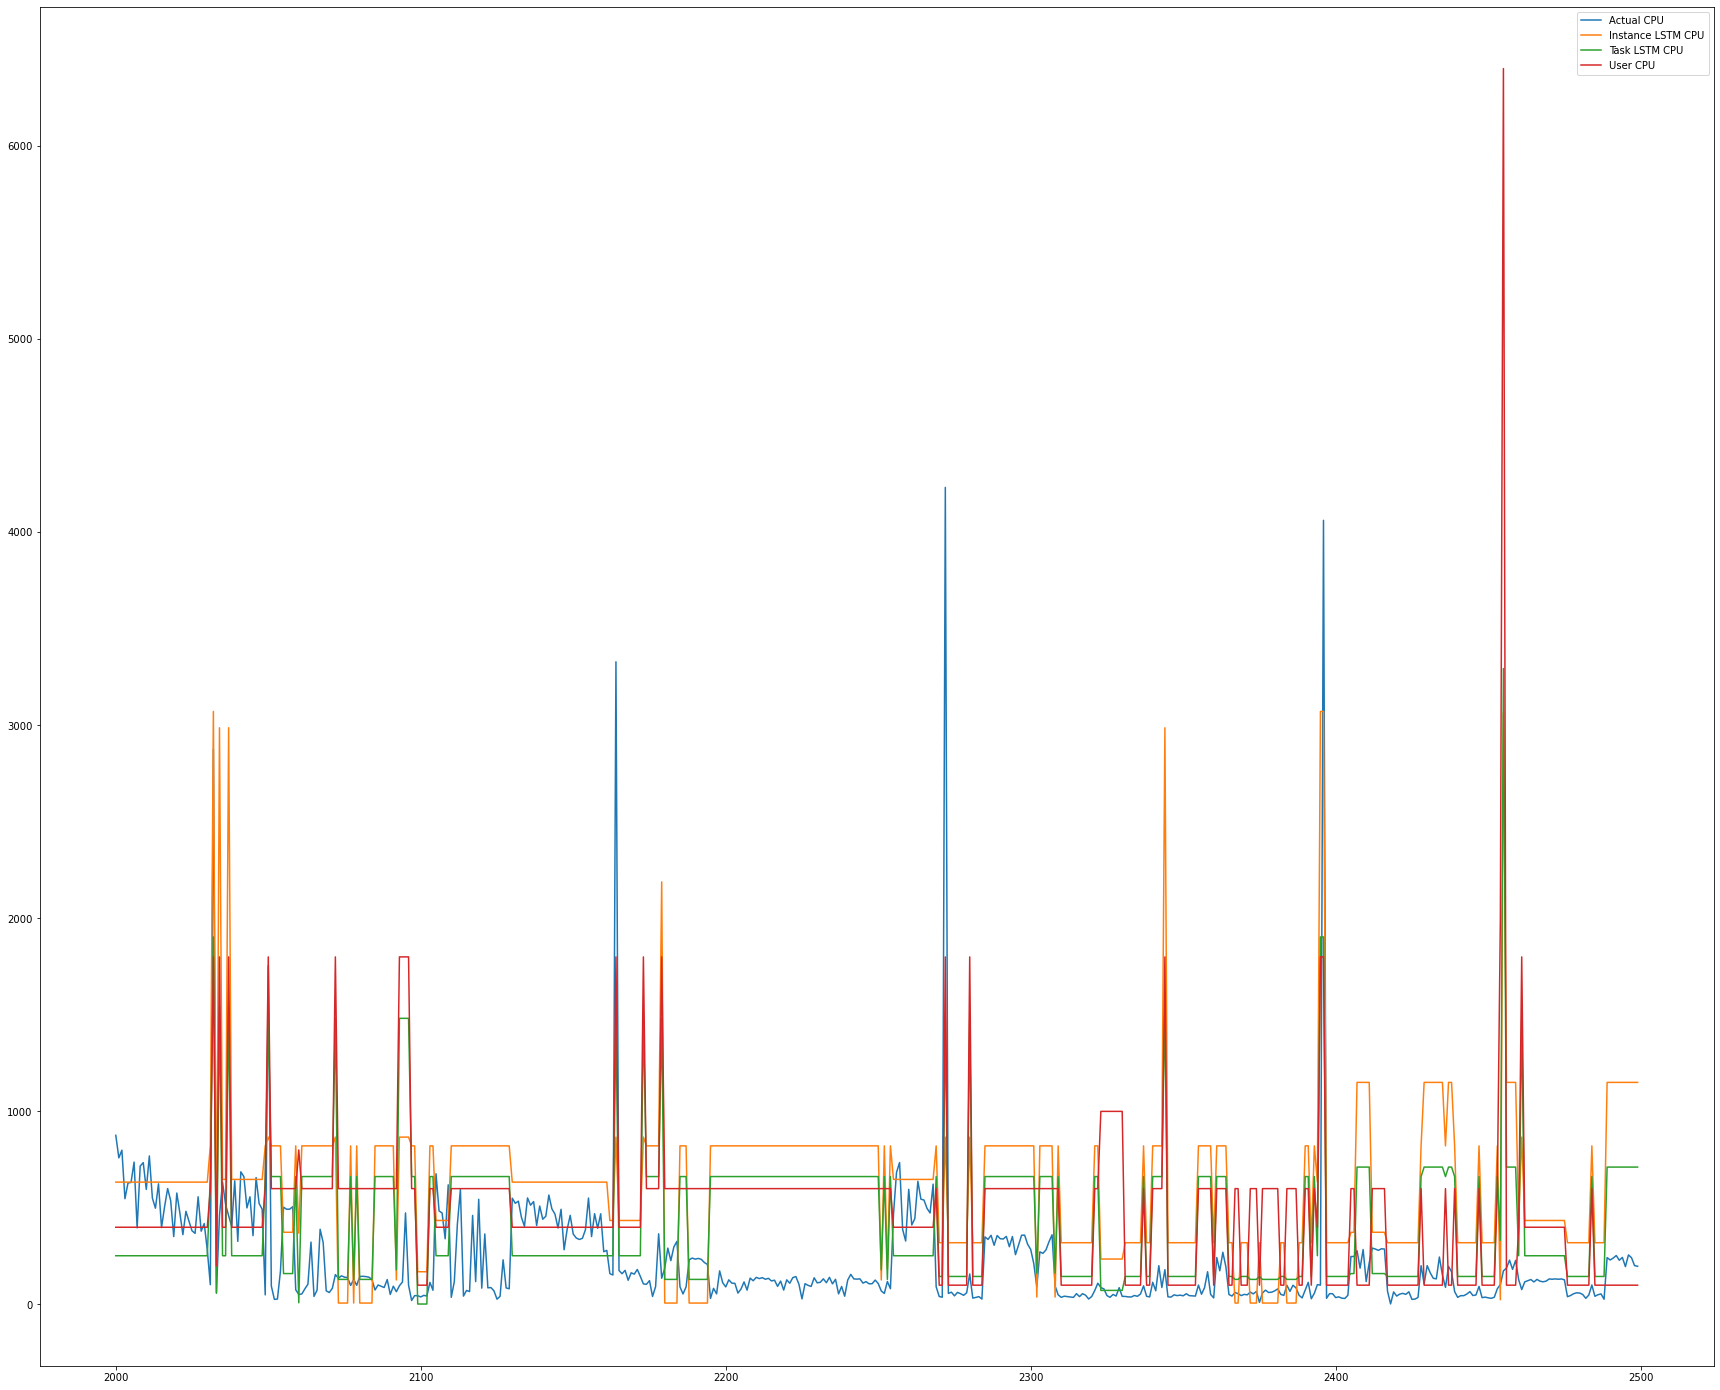

In [160]:
comp_df.iloc[2000:2500].plot.line(figsize=(30, 25))

In [161]:
get_comparing_metrics_df(with_tasks_eval.get_mem_train_df(), to_latex=True)

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &       MAPE &    SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  61.897 &  32287.182 &  119.715 &  56.66 &  43.34 \\
User Predicted &  73.853 &   3672.256 &   97.613 &  80.80 &  19.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,61.897418,32287.181612,119.714561,56.66,43.34
User Predicted,73.853143,3672.256232,97.613105,80.80,19.20


In [162]:
comp_df = compare_predictions(with_instances_eval, with_tasks_eval, left_name='Instance LSTM', right_name='Task LSTM', is_cpu=False)

df_to_latex(comp_df)

\begin{tabular}{lrrrr}
\toprule
{} &  Actual MEM &  Instance LSTM MEM &  Task LSTM MEM &  User MEM \\
\midrule
mean &      17.203 &             43.098 &         29.134 &    26.895 \\
std  &      74.761 &             56.496 &         63.342 &    15.259 \\
min  &       0.003 &              0.055 &          0.156 &     2.000 \\
25\%  &       2.160 &             22.294 &          4.537 &    14.648 \\
50\%  &       7.699 &             27.067 &         14.679 &    29.297 \\
75\%  &      15.976 &             62.938 &         27.924 &    29.297 \\
max  &    1992.484 &           1208.922 &        698.983 &   146.484 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [163]:

df_to_latex(with_instances_eval.get_cpu_train_df())
get_comparing_metrics_df(with_instances_eval.get_cpu_train_df(), to_latex=True)

\begin{tabular}{lrrr}
\toprule
{} &  actual cpu usage &  predicted cpu usage &  allocated cpu \\
\midrule
mean &           516.073 &              571.784 &        632.809 \\
std  &           881.832 &              690.524 &        496.245 \\
min  &             1.023 &                4.240 &          5.000 \\
25\%  &           103.632 &              215.433 &        400.000 \\
50\%  &           208.749 &              434.128 &        600.000 \\
75\%  &           528.076 &              821.406 &        600.000 \\
max  &          7790.372 &             6954.110 &       6400.000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &     RMSE &     MAPE &   SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  614.645 &  294.449 &  87.975 &  57.04 &  42.96 \\
User Predicted &  812.497 &  355.049 &  89.466 &  72.80 &  27.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())
/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,614.644706,294.448566,87.975186,57.04,42.96
User Predicted,812.496546,355.048796,89.466367,72.80,27.20


In [164]:
df_to_latex(with_instances_eval.get_mem_train_df())
get_comparing_metrics_df(with_instances_eval.get_mem_train_df(), to_latex=True)

\begin{tabular}{lrrr}
\toprule
{} &  actual mem usage &  predicted mem usage &  allocated mem \\
\midrule
mean &            17.203 &               43.098 &         26.895 \\
std  &            74.761 &               56.496 &         15.259 \\
min  &             0.003 &                0.055 &          2.000 \\
25\%  &             2.160 &               22.294 &         14.648 \\
50\%  &             7.699 &               27.067 &         29.297 \\
75\%  &            15.976 &               62.938 &         29.297 \\
max  &          1992.484 &             1208.922 &        146.484 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &       MAPE &    SMAPE &    OA &    UA \\
\midrule
LSTM Metrics   &  60.415 &  16855.899 &  131.774 &  69.9 &  30.1 \\
User Predicted &  73.853 &   3672.256 &   97.613 &  80.8 &  19.2 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())
/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,60.415129,16855.899052,131.773960,69.9,30.1
User Predicted,73.853143,3672.256232,97.613105,80.8,19.2


In [165]:
evaluations

{'with_penalty_loss': EvaluationScenario(name='with_penalty_loss'),
 'with_tasks': EvaluationScenario(name='with_tasks'),
 'with_no_tasks': EvaluationScenario(name='with_no_tasks'),
 'with_small_batch_size': EvaluationScenario(name='with_small_batch_size'),
 'with_medium_batch_size': EvaluationScenario(name='with_medium_batch_size'),
 'with_instances': EvaluationScenario(name='with_instances'),
 'with_rmse_loss': EvaluationScenario(name='with_rmse_loss'),
 'with_large_batch_size': EvaluationScenario(name='with_large_batch_size')}

In [166]:
with_penalty = evaluations['with_penalty_loss']
with_penalty

EvaluationScenario(name='with_penalty_loss')

In [173]:
comp_df = compare_predictions(with_penalty, with_instances_eval, left_name='Penalty LSTM', right_name='Instance LSTM', is_cpu=False)
comp_df

,Actual MEM,Penalty LSTM MEM,Instance LSTM MEM,User MEM
0,20.825195,100.061554,87.139938,10.000000
1,29.648438,92.161674,47.378555,29.296875
2,29.830078,92.161674,47.378555,29.296875
3,29.396484,92.161674,47.378555,29.296875
4,29.597656,92.161674,47.378555,29.296875
...,...,...,...,...
4995,0.512695,10.491239,0.055029,29.296875
4996,0.525391,10.491239,0.055029,29.296875
4997,0.522461,10.491239,0.055029,29.296875
4998,0.531250,10.491239,0.055029,29.296875


In [174]:
df_to_latex(comp_df)

\begin{tabular}{lrrrr}
\toprule
{} &  Actual MEM &  Penalty LSTM MEM &  Instance LSTM MEM &  User MEM \\
\midrule
mean &      17.203 &            65.128 &             43.098 &    26.895 \\
std  &      74.761 &            64.252 &             56.496 &    15.259 \\
min  &       0.003 &             1.639 &              0.055 &     2.000 \\
25\%  &       2.160 &            19.961 &             22.294 &    14.648 \\
50\%  &       7.699 &            60.018 &             27.067 &    29.297 \\
75\%  &      15.976 &            85.906 &             62.938 &    29.297 \\
max  &    1992.484 &          1251.511 &           1208.922 &   146.484 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())


In [167]:
df_to_latex(with_penalty.get_cpu_train_df())
get_comparing_metrics_df(with_penalty.get_cpu_train_df(), to_latex=True)

\begin{tabular}{lrrr}
\toprule
{} &  actual cpu usage &  predicted cpu usage &  allocated cpu \\
\midrule
mean &           516.073 &              595.122 &        632.809 \\
std  &           881.832 &              550.389 &        496.245 \\
min  &             1.023 &                4.481 &          5.000 \\
25\%  &           103.632 &              248.302 &        400.000 \\
50\%  &           208.749 &              571.664 &        600.000 \\
75\%  &           528.076 &              808.049 &        600.000 \\
max  &          7790.372 &             5776.425 &       6400.000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &     RMSE &     MAPE &   SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  637.124 &  275.275 &  82.988 &  70.16 &  29.84 \\
User Predicted &  812.497 &  355.049 &  89.466 &  72.80 &  27.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())
/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_36849/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,637.123971,275.275175,82.987773,70.16,29.84
User Predicted,812.496546,355.048796,89.466367,72.80,27.20


In [184]:
df_to_latex(with_penalty.get_mem_train_df())
get_comparing_metrics_df(with_penalty.get_mem_train_df(), to_latex=True)

\begin{tabular}{lrrr}
\toprule
{} &  actual mem usage &  predicted mem usage &  allocated mem \\
\midrule
mean &            17.203 &               65.128 &         26.895 \\
std  &            74.761 &               64.252 &         15.259 \\
min  &             0.003 &                1.639 &          2.000 \\
25\%  &             2.160 &               19.961 &         14.648 \\
50\%  &             7.699 &               60.018 &         29.297 \\
75\%  &            15.976 &               85.906 &         29.297 \\
max  &          1992.484 &             1251.511 &        146.484 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &    RMSE &       MAPE &    SMAPE &     OA &     UA \\
\midrule
LSTM Metrics   &  77.541 &  27603.612 &  133.192 &  87.38 &  12.62 \\
User Predicted &  73.853 &   3672.256 &   97.613 &  80.80 &  19.20 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_30952/2801411731.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(p_df.to_latex())
/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_30952/3096228288.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_df.round(3).to_latex())


,RMSE,MAPE,SMAPE,OA,UA
LSTM Metrics,77.541484,27603.612051,133.191818,87.38,12.62
User Predicted,73.853143,3672.256232,97.613105,80.80,19.20
